# Problem description

The task is to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4818 non-null object
X2          4818 non-null object
X3          4818 non-null object
X4          4818 non-null object
X5          4818 non-null object
X6          4818 non-null object
X7          4818 non-null object
X8          4818 non-null object
X9          4818 non-null float64
X10         4818 non-null object
X11         4818 non-null object
X12         4818 non-null object
X13         4818 non-null float64
X14         4818 non-null object
X15         4818 non-null object
X16         4818 non-null object
X17         4818 non-null object
X18         4818 non-null object
X19         4818 non-null float64
X20         4818 non-null float64
X21         4818 non-null object
X22         4818 non-null object
X23         4818 non-null float64
X24         4818 non-null object
X25         4818 non-null object
X26         4818 non-null object
X27         4818 non-null obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [6]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



Detailed code for processing and modelling are stored in Supporting functions and Model_functions python notebooks. Here, I import the functionalities in the two files.

In [7]:
from Model_functions import *
from Supporting_functions import *
sppt = Sfunc()
mdl = Mfunc()

### Get the data & Have a Look
Based on the ``data`` we get previously, we firstly transfrom all the variables into numeric. Then we have a look.

In [8]:
## apply pd.to_numeric for data's columns
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.417690,0.05680,1.16050,-126.3900,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.049094,0.85835,0.123220,5.6167,7.4042,164.3100,2.2214,1.3340,0,4510
1,-0.023834,0.210100,0.50839,4.23740,22.0340,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.4460,13.8020,6.4782,0,3537
2,0.030515,0.446060,0.19569,1.56500,35.7660,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.252660,15.0490,2.8179,104.7300,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68000,438.2000,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.085524,0.97282,0.000000,6.0157,7.4626,48.7560,7.4863,1.0602,0,1806
4,0.000992,0.497120,0.12316,1.30360,-71.3980,0.000000,0.001007,1.01160,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.5820,114.5800,3.1854,2.7420,0,1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,0.211990,0.205850,0.14170,1.79410,72.9810,0.000000,0.265310,3.85790,0.98420,0.79415,...,0.266940,0.73275,0.022101,NaN,3.5081,66.1710,5.5160,1.4476,0,1985
4814,0.311900,0.099580,0.57936,10.67900,245.9800,0.000000,0.313170,9.04220,1.05160,0.90042,...,0.346400,0.70705,0.044114,14.0180,7.0618,20.7760,17.5680,2.9149,0,3963
4815,-0.029746,0.448980,0.39136,1.93880,7.8073,-0.020006,-0.030561,1.22590,1.00010,0.55040,...,-0.054046,0.99986,0.058336,15.5470,8.7022,34.3700,10.6200,23.0860,0,4167
4816,0.284730,0.079573,0.46261,6.81370,-81.1580,-0.795510,0.284730,11.56700,6.07180,0.92043,...,0.309350,0.19889,0.000000,NaN,28.5000,4.7834,76.3050,13.2630,0,1579


Having a rough look at it, some columns in str type have been transformed to numeric type. Also, NaN occurs in the dataframe and Bankrupt is dominated by 0, reminding us to apply NaN imputation and imbalance data treatment. Besides, their scales vary between different columns, reminding us to standardize. 

### Define performance measure

As we assume that it is 5 times worse to fail to identify a company that will go bankrupt than it is to fail to identify a company that won't go bankrupt, we can evaluate our model based on both precision and recall. The marginal effect of recall is 5 times the marginal effect of precision. So, to create a unified measure which satisfies the demand, I use this functional form: 5/6 * recall + 1/6 * precision. This function is defined in ``Mfunc`` class, utilityFunc.

In [9]:
from sklearn.metrics import make_scorer
U_score = make_scorer(mdl.utilityFunc, greater_is_better=True)

Even though I assign 5/6 to recall, it's still inappropriate after applying U_score to implementation. Because precision can vary greatly and affect our decision. For imbalanced dataset and our target, it's most important to focus solely on recall when training and tuning our model. As a result, I created the following Rec_score.

In [10]:
Rec_score = make_scorer(mdl.utilityFunc2, greater_is_better=True)

### Create test set
Here, we seperate the data into test set and train set. To make sure there will be no data leakage, the test set will not be used anytime before final performance evaluation. 
``ShuffleSplit`` function (in Sfunc class) achieves both random shuffle and test train split. This treatment can further improve randomness. As we have more than 4000 samples, we can keep 90% to train and 10% to test. 

In [11]:
X_train, X_test, y_train, y_test = sppt.ShuffleSplit(data, 0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4336, 64), (482, 64), (4336,), (482,))

Here, we have 4336 training samples and 482 testing samples after shuffling and spliting.

### Exploratory Data Analysis
#### Visualization
In this part, I plot the distribution of the 64 features, the missing value situation, missing value distribution, outlier's situation, imbalance situation, the correlation between the variables. 

- Descriptive Presentation

Firstly, let me present the descriptive table of the 64 variables.

In [12]:
sppt.DesTable(X_train)

,count,mean,std,min,25%,50%,75%,max
X1,4335.0,-0.065799,7.069455,-463.890000,0.004096,0.046998,0.117555,2.352300e+00
X2,4335.0,0.533799,1.256399,0.000000,0.253735,0.449300,0.662295,7.241600e+01
X3,4335.0,0.190197,1.343524,-72.067000,0.045905,0.219470,0.422630,2.833600e+01
X4,4322.0,5.071678,105.320991,0.004819,1.105250,1.642700,2.945925,6.845800e+03
X5,4326.0,265.782085,19072.390988,-69473.000000,-42.533000,1.312850,50.063000,1.250100e+06
...,...,...,...,...,...,...,...,...
X60,4131.0,61.688398,702.368756,-12.440000,5.275800,8.988100,17.098500,2.474200e+04
X61,4326.0,11.131915,45.263215,-0.092493,4.225325,6.153500,9.305900,1.308500e+03
X62,4336.0,174.698387,2359.162460,0.000000,44.696500,73.767000,118.290000,1.274500e+05
X63,4322.0,9.129414,116.693877,0.000000,3.079650,4.935050,8.113575,7.641300e+03


In this table, we can find that each variable varies greatly in terms of standard deviation, mean and median level. So it's important that we standardize the data. 

To explore the extent as to each variable's concentration, I plot the following density plot for individual variables. 

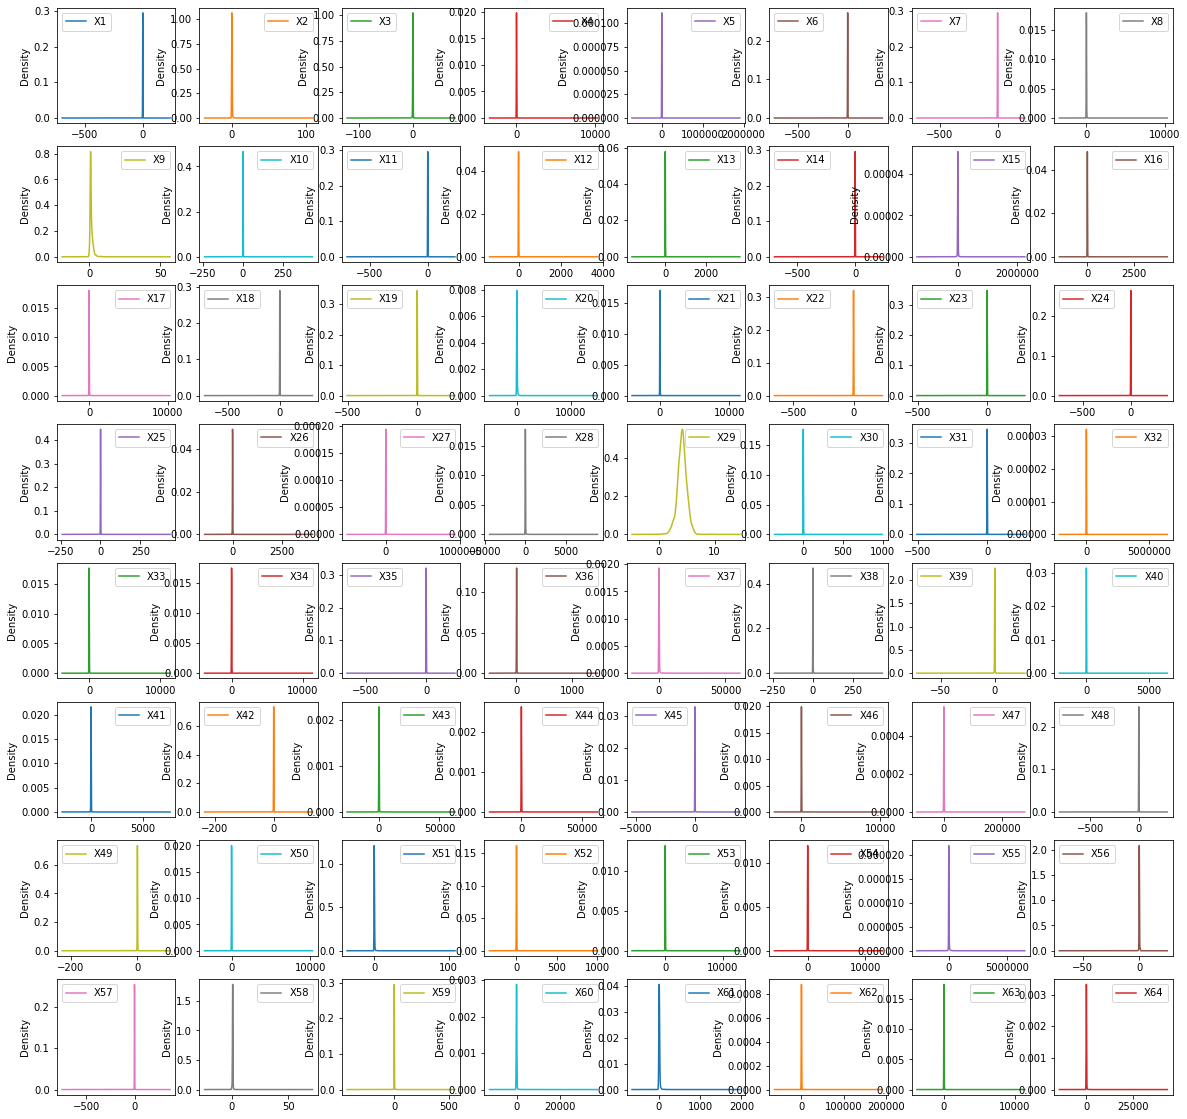

In [13]:
_ = sppt.DesBoxplot(X_train)

Looking at the distribution of the variables, most of the variables are clustered at certain level. Such variables might provide little information. Here, we will need to implement data transformation as well as dimension reduction. In particular, X29 has a more scattered distribution. To further explore their predictivity, I plot the variable values conditional on ``y``.

- Box Plot Conditional on ``y``

In this part, each subplot is grouped by y value. In this plot, each variable is rescale to 0 - 1 by the formula `` X - min(X) / max(X) - min(X)`` to make them more comparable. 

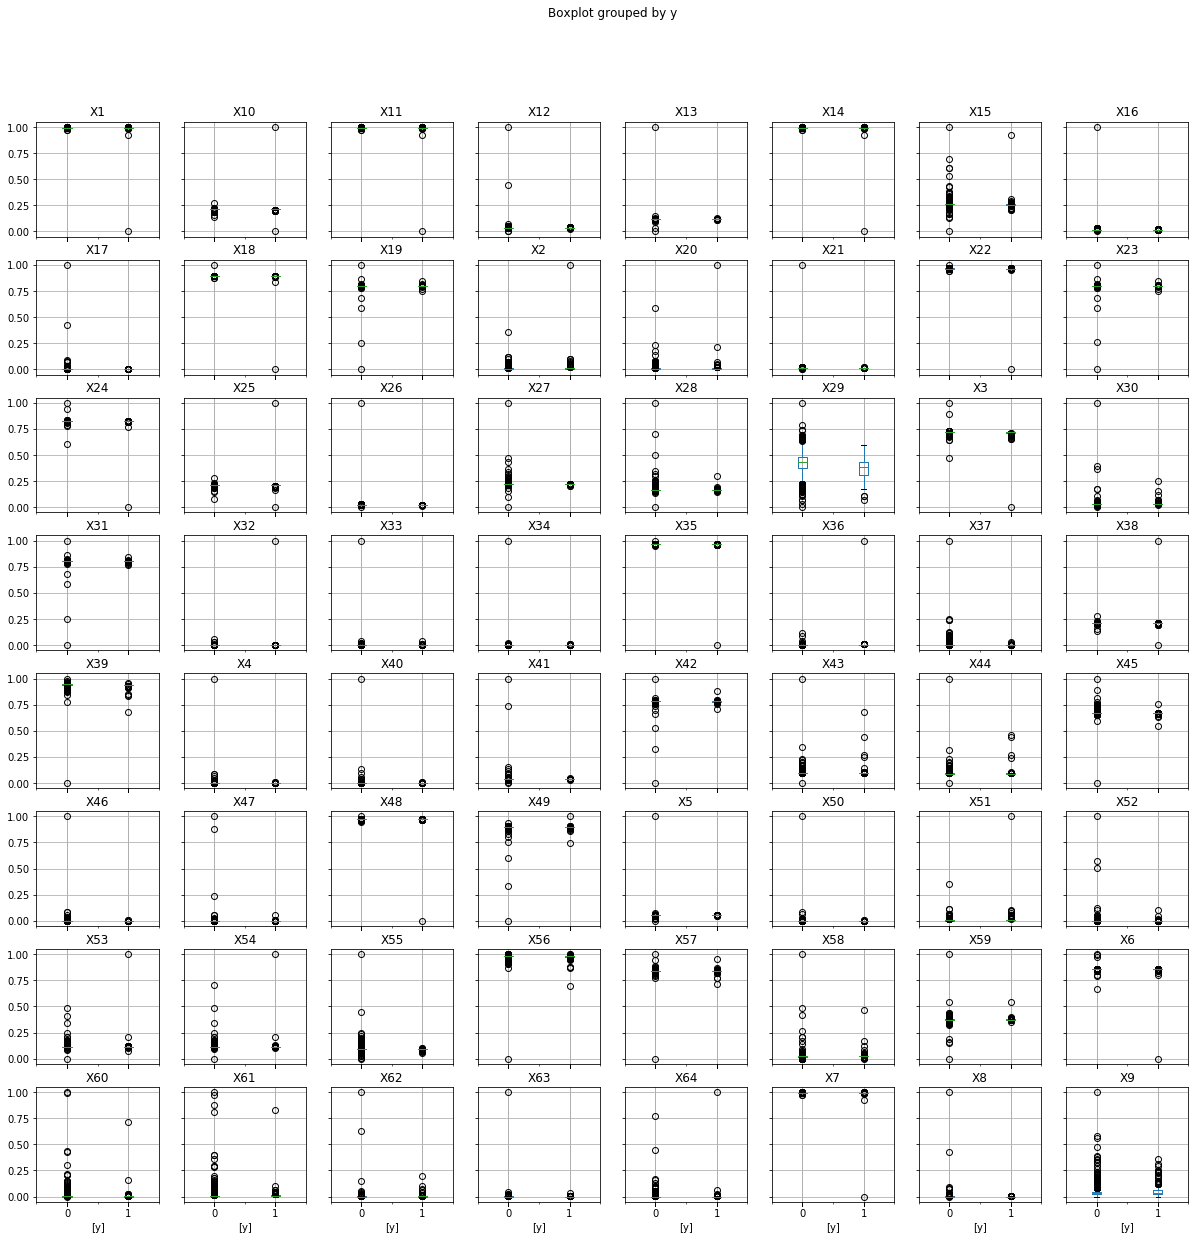

In [14]:
_ = sppt.CondPlot(X_train, y_train)

In this plot, I am pleased to find that though the previous distribution plot shows little pattern, this grouped box plot exhibits difference between normal companies and bankrupted companies. Meanwhile, the patterns are implicit, which requires me to use more delicate models and data transformation to extract a clear pattern to predict bankruptcy. 

- Counting Missing Values for Each Variable

Here we plot how many samples are missing for each variable.

48 out of 64 variables have NaN.
5 variables with the most NaN:

 X37    1868
X27     276
X60     205
X45     205
X24     103
dtype: int64


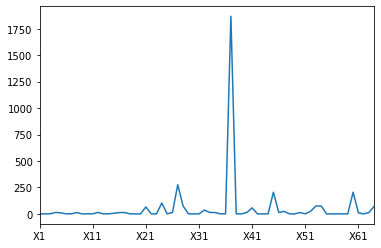

In [15]:
na_number= sppt.CountNa(X_train)
_ = sppt.ReportNa(na_number)

Hence, most of the variables have NaN. In the following cleaning process, we need to create a pipeline for dealing with this issue.
In particular X37 has the greatest number of NaN. We may apply special treatment for this variable. Colomn pipeline will be of great use here. 

- Have a Look at the Outliers

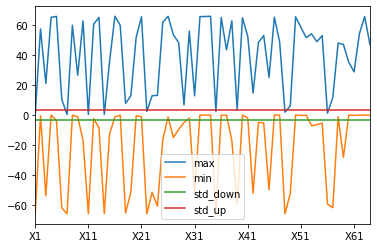

In [16]:
_ = sppt.OutlierPlot(X_train)

In the above plot, I plotted max value and min value's number of std away from each variable's mean, together with a 3 std band. THe red line and green line in the above chart is 3 standard deviation band (+- 3 std). Some variables have deviation as high as 60 std, far exceeding the 3 std band. Hence, the outlier situation is severe in this case. As a treatment, we can either use models which are less sensitive to outliers, e.g. SVC, or incorporate outlier treatment into our pipeline. The threshold is remain to be decided.

Having said that, now let's turn to the percentage of outliers (those exceeding 3 std) in each variable. 

Highest outlier percentage defined by >= 3 std is  0.0115.
Lowest outlier percentage defined by >= 3 std is  0.0002.

5 variables with largest percentage of outliers:

X9     0.011531
X55    0.006919
X29    0.005996
X61    0.005304
X15    0.005074
dtype: float64


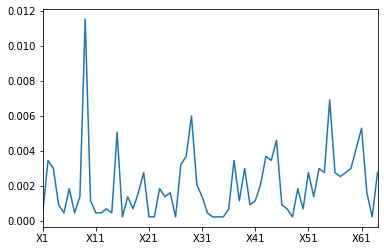

In [17]:
_ = sppt.OutlierPercentage(X_train)

From this analysis, we can conclude the outlier situation is under control. Most of the variables have less than 30 outliers in the training sample. Only 5 variables have a percentage larger than 0.5%. Moreover, we need to pay special attention to variable X9. It has the largest percentage of ouliers, nearly twice than the second one. 

- Imbalance Data Issue Overview

In this part, we have a brief look at the imbalance situation. Because generally speaking, the percentage of normal companies tends to outweight those bankrupted companies. Here, we provide numerical evidence, which support our attention to use multiple methods to address the imbalanced data problem. 

Bankrupted companies add up to  0.0634.
Normal companies add up to  0.9366.


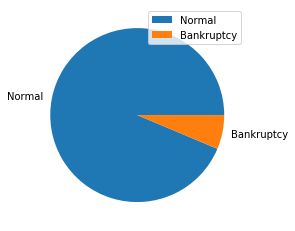

In [18]:
def ImbalanceShow(y_train):
    count_y = [(y_train == 0).sum(), (y_train == 1).sum()]
    c = plt.pie(count_y, labels=['Normal', 'Bankruptcy'])
    c = plt.legend()
    print("Bankrupted companies add up to {a: .4f}.".format(a=count_y[1]/sum(count_y)))
    print("Normal companies add up to {a: .4f}.".format(a=count_y[0]/sum(count_y)))
    return c
_ = ImbalanceShow(y_train)

From the above pie chart, we observe a severe imbalanced data situation. To ensure the performance of predicting company bankruptcy, we need to implement upsampling for bankrupted companies or other methods to address this problem.  

- Correlation between Variabls

Here, we examine the correlations between the variables. 

In [19]:
sppt.CorrelationShow(X_train)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
X1,1.00,-0.07,0.07,0.01,0.00,0.94,1.00,0.01,-0.01,-0.93,...,0.01,0.01,0.01,-0.01,0.0,0.00,-0.08,-0.00,0.02,-0.71
X2,-0.07,1.00,-0.90,-0.01,-0.01,-0.10,-0.07,-0.02,0.20,-0.30,...,-0.06,-0.06,-0.00,0.06,0.0,-0.00,0.05,0.06,-0.02,0.01
X3,0.07,-0.90,1.00,0.02,0.01,0.09,0.07,0.02,-0.14,0.29,...,0.05,0.05,0.00,-0.04,-0.0,0.00,-0.05,-0.07,0.02,-0.00
X4,0.01,-0.01,0.02,1.00,0.00,-0.00,0.01,0.91,-0.01,0.01,...,-0.00,0.00,0.00,-0.00,-0.0,0.00,-0.00,-0.00,0.99,0.01
X5,0.00,-0.01,0.01,0.00,1.00,0.00,0.00,0.00,-0.02,0.00,...,0.00,0.02,0.00,-0.02,-0.0,0.00,-0.00,-0.03,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X60,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.03,-0.00,...,-0.01,-0.01,0.00,0.00,-0.0,1.00,-0.00,-0.01,0.04,0.01
X61,-0.08,0.05,-0.05,-0.00,-0.00,-0.05,-0.08,-0.00,0.14,-0.05,...,-0.01,-0.01,-0.00,0.00,0.0,-0.00,1.00,-0.00,0.00,-0.00
X62,-0.00,0.06,-0.07,-0.00,-0.03,-0.01,-0.00,-0.00,-0.04,-0.02,...,-0.01,-0.55,-0.00,0.69,-0.0,-0.01,-0.00,1.00,-0.00,-0.00
X63,0.02,-0.02,0.02,0.99,-0.00,0.00,0.02,0.91,0.01,0.02,...,-0.00,0.00,0.00,-0.01,-0.0,0.04,0.00,-0.00,1.00,0.01


From the above correlation matrix, we can observe some high correlated variables, which underlines the importance to use methods to address multicollinearity, such as PCA. 

### Prepare the Data
#### Cleaning

- Imputer Pipeline

Combining the sense we have from the visualization process, our tasks is firstly use an imputer to fill in those NaN. X37, X27, X60, X45, among all the variables, have relatively more NaN. 

Our baseline imputer pipeline is SimpleImputer. Because the existence of outlier and most variables have rather consistent values, it would be advisable to use most frequent rather than mean as strategy.  

0 out of 64 variables have NaN.
5 variables with the most NaN:

 63    0
62    0
29    0
28    0
27    0
dtype: int64


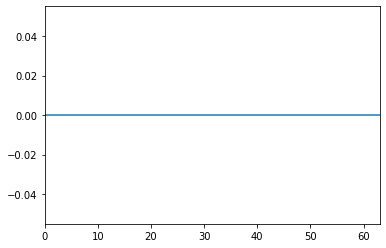

In [20]:
pipe, name = mdl.simpleimputer("most_frequent")
X_train_1 = pipe.fit_transform(X_train)
cnt_na = sppt.CountNa(pd.DataFrame(X_train_1))
_ = sppt.ReportNa(cnt_na)

The above pipeline for simple imputing can eliminate all the NaN. Futhermore, for X37, X27, X60, X45, we want to use more advanced method to impute as they have more NaN and the imputation process tends to put heavier weight on the final result of our model. Here, we use simpleimputer for other variables and multivariate feature imputation for the 4 variables. 

0 out of 64 variables have NaN.
5 variables with the most NaN:

 63    0
62    0
29    0
28    0
27    0
dtype: int64


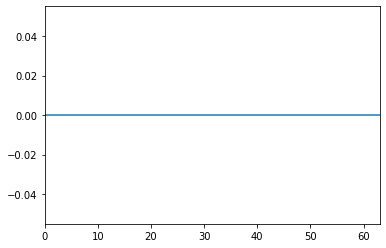

In [21]:
pipe, name = mdl.multivariateimputer()
cnt_na = sppt.CountNa(pd.DataFrame(pipe.fit_transform(X_train)))
_ = sppt.ReportNa(cnt_na)

Both of the imputer can eliminate all the NaN. Now, we use column transformer to construct the new imputer as described above. 

0 out of 64 variables have NaN.
5 variables with the most NaN:

 63    0
62    0
29    0
28    0
27    0
dtype: int64


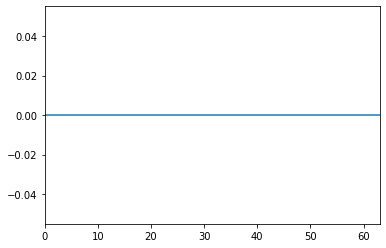

In [22]:
pipe, name = mdl.combinedimputator(["X37", "X27", "X60", "X45"])
cnt_na = sppt.CountNa(pd.DataFrame(pipe.fit_transform(X_train)))
_ = sppt.ReportNa(cnt_na)

To sum up, we create three pipelines for data imputation: simple imputer using most frequent value, multivariate imputer, a column transformer imputer which combines the aforesaid two. 

#### Data Transformation



In this part, I transform the data for modelling purpose by dealing with the outlier, the imbalanced data, linearity between the variables, standardization the data.


- Outlier Treatment

Let's treat the outlier. In the previous part, we saw that outliers could go far away as 60 std. Hence it's necessary to implement winsorization as a way to treat outliers. I choose 10% percentile and write a individualized ``Winsor`` function to pack it into pipeline. So for values greater than 90% percentile, it will be set at 90% percentile. For values less than 10% percentile, it will be set at 10% percentile. Other values stay the same. 

In [23]:
winsor = Winsor()
X_train_2 = winsor.fit_transform(X_train_1)
print("X8 max after: {a: .6f}; X8 max before: {b: .6f}".
      format(a=X_train_2[:, 7].max(), b=X_train_1[:, 7].max()))

X8 max after:  6.444250; X8 max before:  6868.500000


I randomly pick up a variable to see the effect. X8's max value becomes smaller after the self-defined ``Winsor`` class. Hence, this transformation tool works. I packet it into a pipeline ``winsortransform``.

- Scaling

Here, I use standardizing scaler to rescale this data. The corresponding pipeline is called scaler. 

In [24]:
pipe, name = mdl.scaler()
X_train_3 = pipe.fit_transform(X_train_2)
print(pd.DataFrame(X_train_3).mean().round(2))
print(pd.DataFrame(X_train_3).std().round(2))

0     0.0
1    -0.0
2     0.0
3    -0.0
4     0.0
     ... 
59    0.0
60    0.0
61    0.0
62    0.0
63   -0.0
Length: 64, dtype: float64
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
59    1.0
60    1.0
61    1.0
62    1.0
63    1.0
Length: 64, dtype: float64


After the standardization process, now each variable is centered at 0, with std equal to 1. 

- Principal Component Analysis

Because we find multicollinearity, I use PCA to reduce it. As for the variance to retain, I choose the thumb rule 95%. We create a pipeline called ``pca``.

In [25]:
pipe, name = mdl.pca()
X_train_4 = pipe.fit_transform(X_train_3)
print(X_train_4.shape)

(4336, 23)


After PCA transformation, we can simply exploit less variables to retain 95% variance. It's beneficial for out sample prediction as well as multicollinearity. In this case, 23 variables can retain 95% of all information. 

- Treat Imbalanced Data

To address the severe imbalanced data issue, one way is upsampling, the other is changing the weights in classifier.

Here, we use imbalance learn to create a pipeline for the first method. Here, we use SMOTE and create a corresponding pipeline ``oversample``.

In [26]:
pipe, name = mdl.oversample()
X_train_5, y_train_5 = pipe.fit_resample(X_train_4, y_train)
X_train_5.shape, y_train_5.shape

((8122, 23), (8122,))

[4061, 4061]
Bankrupted companies add up to  0.5000.
Normal companies add up to  0.5000.


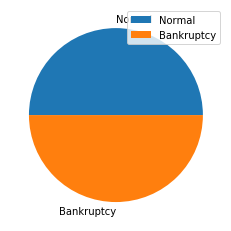

In [27]:
_ = sppt.ImbalanceShow(pd.Series(y_train_5))

Now after implementing SMOTE, we oversample for bankrupted companies. Each category adds up to 50%. 

Another method is to use parameter ``class_weight`` in classifier. "balanced" can also oversample the bankrupt category. 

#### Transformation Pipelines
These following pipelines are automatically generated via Mfunc model ``PipelineDict`` function. Every pipeline will include an assigned classifier.  

* Pipe1: Simple Imputer -> Outlier Treatment -> Standardization -> PCA -> SMOTE

* Pipe2: Simple Imputer -> Outlier Treatment -> PCA -> Standardization

This pipeline doesn't include SMOTE. Instead it will adjust weight in each classifier. 

* Pipe3: Simple Imputer -> Outlier Treatment -> Standardization -> SMOTE

This pipeline doesn't include PCA. 

* Pipe4: Multivariate Imputer -> Outlier Treatment -> Standardization -> PCA -> SMOTE

This pipeline changes simple imputer to multivariate imputer compared with Pipe1.

* Pipe5: Multivariate Imputer -> Outlier Treatment -> Standardization

This pipeline doesn't have both SMOTE and PCA

* Pipe6: Multivariate Imputer -> Outlier Treatment -> Standardization -> PCA

This pipeline doesn't include SMOTE.


* Pipe7: Multivariate Imputer -> Outlier Treatment -> Standardization -> SMOTE

This pipeline doesn't include PCA.

### Train a Model

The model selection process takes the following steps:
- Pick up models which are to be tested on.
- Apply different preprocess pipeline to each model. 
- Fit all the models.
- Calculate CV score and in sample performancel. Select the best preprocess pipeline for each model. 
- Use grid search cv to tune each model's hyperparaters.


#### Models to be used
Here, I use a hashmap ``clf_dict`` to store the classifiers as value and its name as key. As this is a supervised learning problem, these models will be applied:
- Logistic Regression
- Nearest Neighbors Classifier
- Naive Bayes
- Decision Trees
- Ensemble methods 
    - Bagging Estimator
    - Forests of Randomized Trees
    - AdaBoost
    - Gradient Tree Boosting
- Support Vector Machines
- Supervised Neural Network Model

In each category, clf_dict may have different models with different settings in parameters. At the meantime, the tunable parameters are stored in hyper_dict for future hyper parameter tuning purposes. 

In [28]:
clf_dict = dict()
hyper_dict = dict()

##### Logistic Regression
L1 regulization panelizes parameters in absolute value fashion while L2 in squared fashion. Another regulization Elastic-Net regulization combines the two. Rho controls the balance between L1 and L2. When Rho = 0, it has the same loss function as L2 panelty. When Rho = 1, it has the same loss function as L1 panelty. "saga" ``Solver`` can handle L1, L2, and Elastic-Net. So I choose it as my solver. As for class_weight parameter, it adjusts imbalanced data weight. So for pipe 2, 5, 6, it can compare the effectiveness between SMOTE and this parameter setting. For SMOTE included pipelines, it will not function as the data has already been adjusted to balanced data. For Elastic-Net regulization, we can adjust Rho via l1_ratio.

Based on this, I create 3 logistic regression classifier with Elastic-Net panelty, adjusting l1_ratio to 0, 0.5, 1. As for hyperparameter tuning, this parameter will be tuned with greater granularity. Also, panelty strength C will be tuned. 

In [29]:
from sklearn.linear_model import LogisticRegression
clf_dict['lgt0'] = LogisticRegression(penalty='elasticnet', 
                                      fit_intercept=True, 
                                      class_weight='balanced', 
                                      solver='saga', 
                                      l1_ratio=0, max_iter=10000)
lgt_param = [{'lgt0__C': [0.1, 1, 10, 100], 
              'lgt0__l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1.0]}]
hyper_dict['lgt0'] = lgt_param

clf_dict['lgt.5'] = LogisticRegression(penalty='elasticnet', 
                                      fit_intercept=True, 
                                      class_weight='balanced', 
                                      solver='saga', 
                                      l1_ratio=0.5, max_iter=10000)

clf_dict['lgt1'] = LogisticRegression(penalty='elasticnet', 
                                      fit_intercept=True, 
                                      class_weight='balanced', 
                                      solver='saga', 
                                      l1_ratio=1, max_iter=10000)

##### Nearest Neighbors
Nearest Neighbors algorithm has two category, K neighbors and Radius neighbors. From our visualization, the distribution of the data are scattered. Hence, it's better to use K neighbors. The parameter to tune is ``n_neighbors``, which describes the number of neighbors to consider when making a classification. 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf_dict['knn'] = KNeighborsClassifier()
hyper_dict['knn'] = [{'knn__n_neighbors': [3, 5, 7, 10, 15]}]

##### Naive Bayes
For Naive Bayes algorithm, I choose Gaussian Naive Bayes classifier.

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_dict['gnb'] = GaussianNB()

##### Decision Tree
Here, we use decision tree classifier. In the following tuning process, we can explore different values in max_depth, min_samples_split in hyperparameter tuning. As for calss_weight, I set it to be "balanced".

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_dict['dtc'] = DecisionTreeClassifier(class_weight="balanced")
hyper_dict['dtc'] = [{'dtc__max_depth': [None, 3, 5, 7]}]

##### Bagging Estimator
Bagging is great way to reduce variance and overfitting problem. Here, I constructed a bagging based on logistic regression algorithm. For hyperparameters tuning, we can alter max_samples and max_features. Here, I set them to be 0.5.

In [33]:
from sklearn.ensemble import BaggingClassifier
clf_dict['bag'] = BaggingClassifier(clf_dict['lgt0'], max_samples=0.5, max_features=0.5)
hyper_dict['bag'] = [{'bag__max_samples': [0.3, 0.5, 0.7], 
                      'bag__max_features': [0.3, 0.5, 0.7]}]

##### Random Forest
Apart from the parameters of regular decision tree, RF classifier needs to specify max_samples and max_features. These will get tuned in the hyperparameter tuning process. 

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_dict['rfc'] = RandomForestClassifier(class_weight="balanced")
hyper_dict['rfc'] = [{'rfc__max_samples': [0.3, 0.5, 0.7], 
                      'rfc__max_features': [0.3, 0.5, 0.7], 
                      'rfc__max_depth': [None, 3, 5, 7]}]

##### Ada Boost
Adaboost constantly estimates more about the badly predicted samples. Here, I use decision tree and logistic regression as base estimator.

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf_dict['adadt'] = AdaBoostClassifier(clf_dict['dtc'])
clf_dict['adalg'] = AdaBoostClassifier(clf_dict['lgt0'])

##### Gradient Tree Boosting
For Gradient Tree Boosting, each following weak classifier predict on the error from last weak classifier. I choose to vary max_depth and subsample. Max_depth limits the number of nodes in the tree. Meanwhile, subsample less than 1 means its a stochastic gradient boosting. To lessen overfitting, I set subsample to 0.7. 

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
clf_dict['gbc'] = GradientBoostingClassifier(subsample=0.7, max_depth=3)
hyper_dict['gbc'] = [{'gbc__subsample': [0.5, 1], 
                      'gbc__max_depth': [1, 3, 5]}]

##### Support Vector Machine
For this model, I tune C, strength of regularization in the hyperparameter tuning. 

In [37]:
from sklearn.svm import SVC
clf_dict['svc'] = SVC()
hyper_dict['svc'] = [{'svc__C': [0.5, 1, 10]}]

##### Neural Network
Due to the great number of features, I use Neural Network as well. Because NN can provide insights on the inner connection between the variables and via multiple layers. 

In [38]:
from sklearn.neural_network import MLPClassifier
clf_dict['nn'] = MLPClassifier()

To date, I create all the classifiers. Let's have a look at clf_dict:

In [39]:
clf_dict

{'lgt0': LogisticRegression(class_weight='balanced', l1_ratio=0, max_iter=10000,
                    penalty='elasticnet', solver='saga'),
 'lgt.5': LogisticRegression(class_weight='balanced', l1_ratio=0.5, max_iter=10000,
                    penalty='elasticnet', solver='saga'),
 'lgt1': LogisticRegression(class_weight='balanced', l1_ratio=1, max_iter=10000,
                    penalty='elasticnet', solver='saga'),
 'knn': KNeighborsClassifier(),
 'gnb': GaussianNB(),
 'dtc': DecisionTreeClassifier(class_weight='balanced'),
 'bag': BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                     l1_ratio=0, max_iter=10000,
                                                     penalty='elasticnet',
                                                     solver='saga'),
                   max_features=0.5, max_samples=0.5),
 'rfc': RandomForestClassifier(class_weight='balanced'),
 'adadt': AdaBoostClassifier(base_estimator=Dec

#### Fit the models, validation and cross validation
Here, we have 7 preprocess pipelines and 13 classifiers. After combination, we obtain 91 different models. I run all the potential models and record both of their in-sample performance and cross-validation performance. In ``Mfunc`` class, I write evaluate function to generate evaluating results and PitPipeDict function to try every preprocess pipeline in pipe_dict. The 7 preprocess pipeline with classifier is generated via PipelineDict in ``Mfunc``.

In [40]:
result = []
for name in clf_dict:
    clf = clf_dict[name]
    pipe_dict = mdl.PipelineDict(clf, name)
    temp = mdl.FitPipeDict(X_train, y_train, pipe_dict, Rec_score, cv=5)
    temp = [[name] + row for row in temp]
    result.extend(temp)
result = pd.DataFrame(result, columns=['clf', 'Pipe#', 'Avg_CV_Recall', 
                                       'In_sample_Recall', 'CV_accuracy'])

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/louxiao/

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarni

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarni

Below is the whole table for the 91 different pipelines.

In [41]:
result

,clf,Pipe#,Avg_CV_Recall,In_sample_Recall,CV_accuracy
0,lgt0,1,0.734545,0.774545,0.809271
1,lgt0,2,0.756364,0.832727,0.824722
2,lgt0,3,0.734545,0.789091,0.804197
3,lgt0,4,0.745455,0.785455,0.823104
4,lgt0,5,0.770909,0.847273,0.851934
...,...,...,...,...,...
86,nn,3,0.360000,1.000000,0.912361
87,nn,4,0.516364,0.996364,0.934501
88,nn,5,0.509091,0.989091,0.952260
89,nn,6,0.450909,0.876364,0.946263


Now, I keep the best model for each classifier, according to their CV accuracy score and CV U score. Relationship between CV accuracy score and CV U score is inversed. So the two indicator needs to be balanced. I make accuracy rate as the first criterion, U score as the second criterion. These 13 models represent the perfect match between preprocess and classifier. 

In [42]:
result_13 = result.sort_values(by=['Avg_CV_Recall', 'CV_accuracy'], ascending=False)
result_13 = result_13.drop_duplicates(subset=['clf'], keep='first')
result_13

,clf,Pipe#,Avg_CV_Recall,In_sample_Recall,CV_accuracy
11,lgt.5,5,0.789091,0.847273,0.855624
48,bag,7,0.785455,0.825455,0.830253
18,lgt1,5,0.778182,0.850909,0.856085
4,lgt0,5,0.770909,0.847273,0.851934
67,adalg,5,0.749091,0.800000,0.856085
34,gnb,7,0.749091,0.752727,0.687503
73,gbc,4,0.690909,0.930909,0.876616
27,knn,7,0.683636,1.000000,0.872462
80,svc,4,0.654545,0.963636,0.900597
90,nn,7,0.570909,0.996364,0.947187


Use a new dict to save the 13 pipelines from different classifier models. 

In [43]:
filtered_pipe = {}
for ix in range(result.shape[0]):
    clf_name = result.iloc[ix, 0]
    pipe_id = result.iloc[ix, 1]
    all_pipe = mdl.PipelineDict(clf_dict[clf_name], clf_name)
    filtered_pipe[clf_name] = all_pipe[pipe_id]

In [44]:
filtered_pipe

{'lgt0': Pipeline(steps=[('mimp', IterativeImputer()), ('out', Winsor()),
                 ('scl', StandardScaler()), ('smt', SMOTE()),
                 ('lgt0',
                  LogisticRegression(class_weight='balanced', l1_ratio=0,
                                     max_iter=10000, penalty='elasticnet',
                                     solver='saga'))]),
 'lgt.5': Pipeline(steps=[('mimp', IterativeImputer()), ('out', Winsor()),
                 ('scl', StandardScaler()), ('smt', SMOTE()),
                 ('lgt.5',
                  LogisticRegression(class_weight='balanced', l1_ratio=0.5,
                                     max_iter=10000, penalty='elasticnet',
                                     solver='saga'))]),
 'lgt1': Pipeline(steps=[('mimp', IterativeImputer()), ('out', Winsor()),
                 ('scl', StandardScaler()), ('smt', SMOTE()),
                 ('lgt1',
                  LogisticRegression(class_weight='balanced', l1_ratio=1,
                          

### Fine Tune
#### One step further: use grid search to select the best parameters
Amoung the 13 models, I want to further explore the best parameter choice so that they can give best prediction. To achieve this, I use grid search in this part. The parameters for choice is stored in ``hyper_dict`` hashmap above. 

In [45]:
from sklearn.model_selection import GridSearchCV
grid_score_dict = {}
grid_param_dict = {}
for clf_name in hyper_dict:
    pipe = filtered_pipe[clf_name]
    optimized_pipe = GridSearchCV(pipe, hyper_dict[clf_name], cv=5, scoring=Rec_score)
    optimized_pipe.fit(X_train, y_train)
    grid_score_dict[clf_name] = optimized_pipe.best_score_
    grid_param_dict[clf_name] = optimized_pipe.best_params_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mimp', IterativeImputer()),
                                       ('out', Winsor()),
                                       ('scl', StandardScaler()),
                                       ('smt', SMOTE()),
                                       ('lgt0',
                                        LogisticRegression(class_weight='balanced',
                                                           l1_ratio=0,
                                                           max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid=[{'lgt0__C': [0.1, 1, 10, 100],
                          'lgt0__l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1.0]}],
             scoring=make_scorer(utilityFunc2))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mimp', IterativeImputer()),
                                       ('out', Winsor()),
                                       ('scl', StandardScaler()),
                                       ('smt', SMOTE()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [3, 5, 7, 10, 15]}],
             scoring=make_scorer(utilityFunc2))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mimp', IterativeImputer()),
                                       ('out', Winsor()),
                                       ('scl', StandardScaler()),
                                       ('smt', SMOTE()),
                                       ('dtc',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             param_grid=[{'dtc__max_depth': [None, 3, 5, 7]}],
             scoring=make_scorer(utilityFunc2))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mimp', IterativeImputer()),
                                       ('out', Winsor()),
                                       ('scl', StandardScaler()),
                                       ('smt', SMOTE()),
                                       ('bag',
                                        BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                                                            l1_ratio=0,
                                                                                            max_iter=10000,
                                                                                            penalty='elasticnet',
                                                                                            solver='saga'),
                                                          max_features=0.5,
                                                         

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mimp', IterativeImputer()),
                                       ('out', Winsor()),
                                       ('scl', StandardScaler()),
                                       ('smt', SMOTE()),
                                       ('rfc',
                                        RandomForestClassifier(class_weight='balanced'))]),
             param_grid=[{'rfc__max_depth': [None, 3, 5, 7],
                          'rfc__max_features': [0.3, 0.5, 0.7],
                          'rfc__max_samples': [0.3, 0.5, 0.7]}],
             scoring=make_scorer(utilityFunc2))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mimp', IterativeImputer()),
                                       ('out', Winsor()),
                                       ('scl', StandardScaler()),
                                       ('smt', SMOTE()),
                                       ('gbc',
                                        GradientBoostingClassifier(subsample=0.7))]),
             param_grid=[{'gbc__max_depth': [1, 3, 5],
                          'gbc__subsample': [0.5, 1]}],
             scoring=make_scorer(utilityFunc2))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mimp', IterativeImputer()),
                                       ('out', Winsor()),
                                       ('scl', StandardScaler()),
                                       ('smt', SMOTE()), ('svc', SVC())]),
             param_grid=[{'svc__C': [0.5, 1, 10]}],
             scoring=make_scorer(utilityFunc2))

Let's have a look at the score after gridsearch.

In [46]:
key = list(grid_score_dict.keys())
value = (grid_score_dict.values())
gs = pd.DataFrame(zip(key, value), columns=['clf', 'GS_recall'])

In [47]:
pd.merge(result_13, gs, how='left', on='clf')
grid_param_dict['bag']

,clf,Pipe#,Avg_CV_Recall,In_sample_Recall,CV_accuracy,GS_recall
0,lgt.5,5,0.789091,0.847273,0.855624,NaN
1,bag,7,0.785455,0.825455,0.830253,0.781818
2,lgt1,5,0.778182,0.850909,0.856085,NaN
3,lgt0,5,0.770909,0.847273,0.851934,0.767273
4,adalg,5,0.749091,0.800000,0.856085,NaN
5,gnb,7,0.749091,0.752727,0.687503,NaN
6,gbc,4,0.690909,0.930909,0.876616,0.727273
7,knn,7,0.683636,1.000000,0.872462,0.778182
8,svc,4,0.654545,0.963636,0.900597,0.672727
9,nn,7,0.570909,0.996364,0.947187,NaN


{'bag__max_features': 0.7, 'bag__max_samples': 0.7}

In the table above, we can conclude:
- After the gridsearchCV hyperparameter tuning, the model with the highest CV recall rate are bagging model together with pipeline 7 and logistic regression with combination of L1 and L2 panelty. 
- The process of hyperparameter tuning improves the recall performance of gradient boost, KNN, support vector machine, and drastically for decision tree, random forest. 
- For logistic regressions, the model with both L1 and L2 panelty has better performance. 
- Models, such as random forest and neural network has great performance in terms of accuracy rate. They reach a level as high as more than 90%. However, they are underperformed with an extremely unsatisfying recall level. 


Because of the focus on bankruptcy and the sturcture of imbalanced data, <u>**I decide to use bagging X logistic model together with pipeline 7.**</u> Though logistic regression also has high scores, an ensembled model, combined by weak classifiers, has less probability of misclassification. 

The the overall workflow is: Multivariate Imputer -> Outlier Treatment -> Standardization -> SMOTE -> Gradient Boost Classifier.

#### Error analysis
In this part, I analyze the error from the my selected model. The analysis include the following angles:
- Numerical metrics including recall, precision, accuracy, F1 score, ROC area, etc.
- Graphic metrics including precision recall curve, roc_curve.
- Confusion Matrix

For a bagging model, no probability is predicted. In this case, we cannot generate ROC curve and precision recall curve for different thresholds. Instead, I firstly get the predicted value from the training set by ``cross_val_predict`` function. Then I calculate various indicators and the confusion matrix. Later, I randomly look at the samples that label bankrupted samples as non-bankrupted samples.

In [66]:
from sklearn.metrics import accuracy_score, recall_score, \
precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc

In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from Model_functions import *
from Supporting_functions import *
sppt = Sfunc()
mdl = Mfunc()

classifier = BaggingClassifier(LogisticRegression(penalty='elasticnet', 
                                      fit_intercept=True, 
                                      class_weight='balanced', 
                                      solver='saga', 
                                      l1_ratio=0, max_iter=10000), max_samples=0.7, max_features=0.7)
clf_name = 'bag'
mimp = IterativeImputer()
out = Winsor()
scl = StandardScaler()
smt = SMOTE()

decided_pipe = Pipeline([('mimp', mimp), ('out', out), ('scl', scl), 
                         ('smt', smt), (clf_name, classifier)])


To get precision_recall_curve, I firstly get probability of predicted y in training set via 5-fold cross validation.

In [68]:
from sklearn.model_selection import cross_val_predict
y_hat = cross_val_predict(decided_pipe, X_train, y_train, cv=5)

In [69]:
rec_s = recall_score(y_train, y_hat)
pre_s = precision_score(y_train, y_hat)
accu_s = accuracy_score(y_train, y_hat)
f1_s = f1_score(y_train, y_hat)

print('Recall is {a: .4f}.'.format(a=rec_s))
print('Precision is {a: .4f}.'.format(a=pre_s))
print('Accuracy is {a: .4f}.'.format(a=accu_s))
print('F1 score is {a: .4f}.'.format(a=f1_s))

Recall is  0.7673.
Precision is  0.2595.
Accuracy is  0.8464.
F1 score is  0.3879.


The values live up to my expectation. Now, let's have a look at the confusion matrix. 

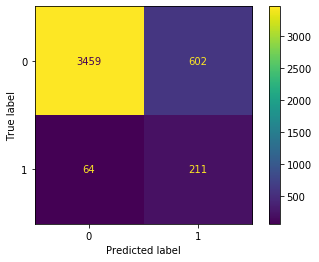

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

From this graph, we can conclude that the percentage of non-bankrupted companies being classified as bankrupted is far less severe than bankrupted companies being classified as non-bankrupted companies. I have a more detailed look at the bankrupted companies that was not marked at bankrupted companies. For the purposing of making prediction, this issue is of far most concern. Comparatively, X9 and X29 have a less concentrated distribution. Here I plot the mislabelled ones with all of the training set.  

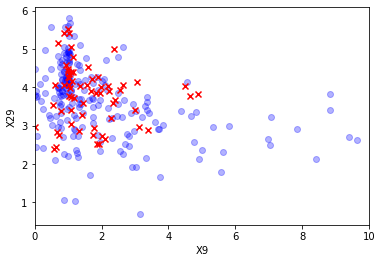

In [71]:
error_ones = X_train[(y_train == 1) & (y_hat == 0)]
all_bank = X_train[(y_train == 1) & (y_hat == 1)]
_ = plt.scatter(all_bank['X9'], all_bank['X29'], alpha=0.3, c='blue', marker='o')
_ = plt.scatter(error_ones['X9'], error_ones['X29'], alpha=1, c='red', marker='x')
_ = plt.xlabel('X9')
_ = plt.ylabel('X29')
_ = plt.xlim([0, 10])

In the graph above, the sample correctly labeled has the same distribution as the erroneous ones. So it is understandable that we come to these erroneous predictions. As least we can confirm the the functional form tends to be correct. 

## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [72]:
import pandas as pd
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

from Model_functions import *
from Supporting_functions import *

def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    sppt = Sfunc()
    mdl = Mfunc()
    
    DATA_DIR = "./Data"
    if not os.path.isdir(DATA_DIR):
        DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"
    data_file = "5th_yr.csv"
    data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file))
    data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
    X_train, y_train = data.iloc[:, :-2], data.iloc[:, -2]
    ## My classifier
    classifier = BaggingClassifier(LogisticRegression(penalty='elasticnet', 
                                      fit_intercept=True, 
                                      class_weight='balanced', 
                                      solver='saga', 
                                      l1_ratio=0, max_iter=10000), max_samples=0.7, max_features=0.7)
    clf_name = 'bag'
    mimp = IterativeImputer()
    out = Winsor()
    scl = StandardScaler()
    smt = SMOTE()

    decided_pipe = Pipeline([('mimp', mimp), ('out', out), ('scl', scl), 
                         ('smt', smt), (clf_name, classifier)])
    decided_pipe.fit(X_train, y_train)
    X_treated = X.iloc[:, :64].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    predictions = decided_pipe.predict(X_treated)
    return predictions

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

In [73]:
name = "Tuned Model for Bankruptcy Prediction, by Xiao Lou"
decided_pipe.fit(X_train, y_train)
y_test_pred = decided_pipe.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

Pipeline(steps=[('mimp', IterativeImputer()), ('out', Winsor()),
                ('scl', StandardScaler()), ('smt', SMOTE()),
                ('bag',
                 BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                                     l1_ratio=0,
                                                                     max_iter=10000,
                                                                     penalty='elasticnet',
                                                                     solver='saga'),
                                   max_features=0.7, max_samples=0.7))])

	Tuned Model for Bankruptcy Prediction, by Xiao Lou Accuracy: 82.4%, Recall 72.7%, Precision 24.0%


The result is similar to that from cross validation. Hence, my model is quite stable and does not prune to get changed by new data set. 

In [74]:
print("Done!")

Done!
